In [8]:
import numpy as np
import theano
from theano import tensor as T
import lasagne
from lasagne.layers import *
from lasagne.nonlinearities import *
from scipy.misc import factorial
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def _remove_trainable(layer):
    for key in layer.params:
        layer.params[key].remove('trainable')

In [67]:
def get_net(k):
    # k = num classes
    l_in = InputLayer((None, 1))
    l_copy = DenseLayer(l_in, num_units=k, nonlinearity=linear)
    l_copy.W.set_value( np.ones((1,k)).astype("float32") )
    _remove_trainable(l_copy)
    c = np.asarray([[(i) for i in range(0, k)]], dtype="float32")
    #print np.fa
    #l_binom_coef = ExpressionLayer(l_copy, lambda x: (factorial(k) / ( factorial(c)*factorial(k - c) )) * x )
    binom_coef = scipy.special.binom(k-1, c)
    #l_logf = ExpressionLayer( l_copy, lambda px: (c*T.log(px)) + ((k-1-c)*T.log(1.-px)) )
    #l_logf = ExpressionLayer(l_logf, lambda px: T.exp(px) )
    #l_logf = ExpressionLayer(l_logf, lambda px: binom_coef*px )
    #### let's try to do a more stable one
    l_logf = ExpressionLayer( l_copy, lambda px: T.log(binom_coef) + (c*T.log(px)) + ((k-1-c)*T.log(1.-px)) )
    l_logf = NonlinearityLayer(l_logf, nonlinearity=softmax)
    
    print c
    print binom_coef
    return l_copy, l_logf

In [68]:
k = 8
c = np.asarray([[(i) for i in range(0, k)]], dtype="float32")
l_copy, l_logf = get_net(k)

[[ 0.  1.  2.  3.  4.  5.  6.  7.]]
[[  1.   7.  21.  35.  35.  21.   7.   1.]]


In [69]:
for layer in get_all_layers(l_logf):
    print layer, layer.output_shape

<lasagne.layers.input.InputLayer object at 0x11cdfe150> (None, 1)
<lasagne.layers.dense.DenseLayer object at 0x11ce31d10> (None, 8)
<lasagne.layers.special.ExpressionLayer object at 0x11cdeb910> (None, 8)
<lasagne.layers.special.NonlinearityLayer object at 0x11cdb1710> (None, 8)


In [70]:
X = T.fmatrix('X')
net_out = get_output(l_logf, X)
p_out = get_output(l_copy, X)
xfake = np.asarray([[0.6]]).astype("float32")
pdist = net_out.eval({X: xfake.astype("float32")})
print pdist, np.sum(pdist)
p = p_out.eval({X: xfake.astype("float32")})
print p

[[ 0.0016384   0.01720319  0.07741438  0.19353598  0.290304    0.26127363
   0.13063681  0.02799361]] 1.0
[[ 0.60000002  0.60000002  0.60000002  0.60000002  0.60000002  0.60000002
   0.60000002  0.60000002]]


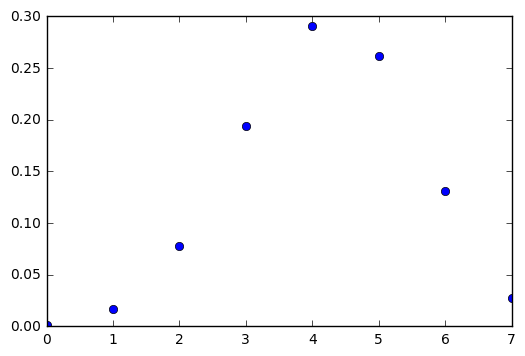

In [71]:
plt.plot(pdist[0],"bo")

In [43]:
ground_dist = scipy.stats.binom.pmf(c, k-1, 0.5)
print ground_dist
print np.sum(ground_dist)

[[ 0.0625      0.25        0.375       0.24999999  0.0625    ]]
0.999999992254


In [37]:
scipy.stats.binom.pmf(c, k-1, p[0][0])

array([[ 0.01456024,  0.10942171,  0.30836833,  0.38623667,  0.18141304]])

In [113]:
type(scipy.special.binom(k-1, c))

numpy.ndarray

-----------

In [377]:
px = 0.21374255158533834
px

0.21374255158533834

In [388]:
c = np.asarray([[(i) for i in range(0, k)]], dtype="float32")
k = 5
binom_coef = scipy.special.binom(k, c)
#binom_coef = 1
tmp = T.exp( (c*T.log(px)) + ((k-c)*T.log(1.-px)) ).eval()
#tmp = (px**c) * ((1-px)**(k-c))
tmp = tmp * binom_coef
#tmp = tmp * binom_coef
print tmp
print np.sum(tmp)

[[ 0.30048574  0.4084323   0.22206305  0.06036741  0.00820538]]
0.999553876657


In [349]:
binom_coef

array([[  5.,  10.,  10.,   5.,   1.]], dtype=float32)

In [358]:
import scipy
?scipy.special.binom(k, c)

In [372]:
# x, n, p
np.sum(scipy.stats.binom.pmf(c, k, p))

0.99955387471228974

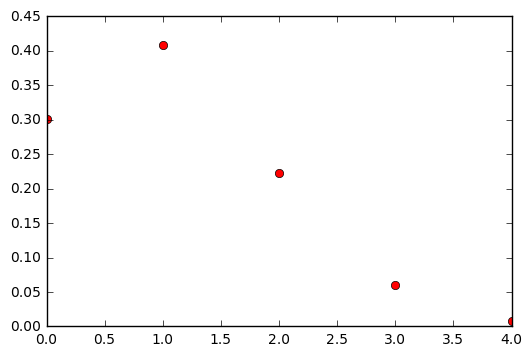

In [374]:
plt.plot(scipy.stats.binom.pmf(c, k, p)[0],"ro")

In [369]:
c

array([[ 1.,  2.,  3.,  4.,  5.]], dtype=float32)

-----

In [29]:
c = np.asarray([[(i+1) for i in range(0, k)]], dtype="float32")
c

array([[ 1.,  2.,  3.,  4.,  5.]], dtype=float32)

In [33]:
factorial(k) / ( factorial(c)*factorial(k - c) )

array([[  5.,  10.,  10.,   5.,   1.]], dtype=float32)

In [32]:
factorial(c)

array([[   1.,    2.,    6.,   24.,  120.]], dtype=float32)

In [34]:
?T.exp

In [184]:
?T.log

In [185]:
T.log(0.5).eval()

array(-0.6931471824645996, dtype=float32)

In [123]:
np.log(0.001)

-6.9077552789821368